In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:

data = pd.read_csv('stress_level.csv')

print(data.head())


          timestamp  what_is_your_age? what_is_your_gender?  \
0  06-10-2024 08:44                 18               Female   
1  06-10-2024 08:44                 19               Female   
2  06-10-2024 08:44                 19                 Male   
3  06-10-2024 08:44                 18                 Male   
4  06-10-2024 08:44                 23               Female   

   what_is_your_current_year_of_study? what_is_your_major_or_field_of_study?  \
0                                    4                                   Law   
1                                    1               Robotics and Automation   
2                                    2                     Civil Engineering   
3                                    4                           BBA General   
4                                    5                      Core Engineering   

   what_is_your_current_gpa_or_average_grade?  \
0                                           7   
1                                         

In [33]:

if 'timestamp' in data.columns:
    data = data.drop(columns=['timestamp'])

numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [34]:

label_encoder = LabelEncoder()

data['what_is_your_gender?'] = label_encoder.fit_transform(data['what_is_your_gender?'])
data['what_is_your_current_living_situation?'] = label_encoder.fit_transform(data['what_is_your_current_living_situation?'])
data['do_you_have_a_part_time_job?'] = label_encoder.fit_transform(data['do_you_have_a_part_time_job?'])
data['do_you_participate_in_extracurricular_activities?'] = label_encoder.fit_transform(data['do_you_participate_in_extracurricular_activities?'])
data['what_coping_mechanisms_do_you_use?'] = label_encoder.fit_transform(data['what_coping_mechanisms_do_you_use?'])


In [35]:

X = data.drop('how_would_you_rate_your_current_stress_level?', axis=1)
y = data['how_would_you_rate_your_current_stress_level?']


In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f'Training data shape: {X_train.shape}, Test data shape: {X_test.shape}')


Training data shape: (4200, 21), Test data shape: (1800, 21)


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns), 
        ('cat', OneHotEncoder(), categorical_columns)  
    ])


X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)



In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8433333333333334
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       314
           1       0.71      0.75      0.73       297
           2       0.76      0.68      0.72       302
           3       0.83      0.88      0.86       292
           4       0.89      0.86      0.88       314
           5       0.95      0.94      0.94       281

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



Accuracy: 0.8433333333333334
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       314
           1       0.71      0.75      0.73       297
           2       0.76      0.68      0.72       302
           3       0.83      0.88      0.86       292
           4       0.89      0.86      0.88       314
           5       0.95      0.94      0.94       281

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



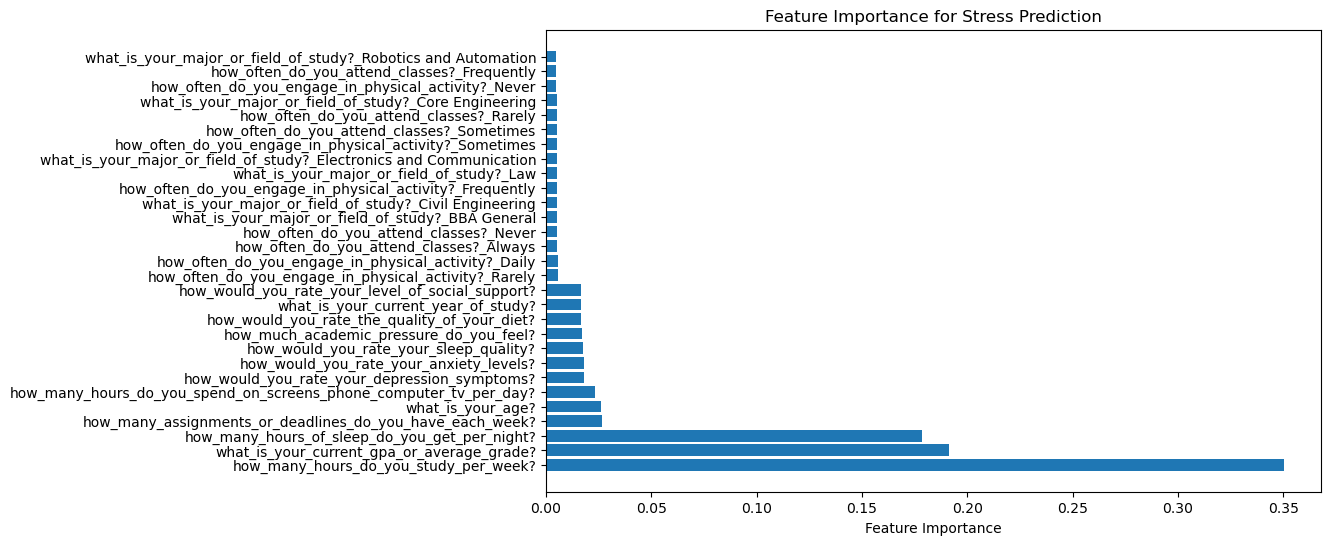

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


feature_importances = model.feature_importances_


preprocessor.fit(X_train) 

one_hot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out()

all_feature_names = np.concatenate([numeric_columns, one_hot_columns])


sorted_idx = np.argsort(feature_importances)[::-1]


plt.figure(figsize=(10, 6))
plt.barh(all_feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Stress Prediction')
plt.show()


In [70]:
data['study_to_sleep_ratio'] = data.apply(
    lambda row: row['how_many_hours_do_you_study_per_week?'] / row['how_many_hours_of_sleep_do_you_get_per_night?']
    if row['how_many_hours_of_sleep_do_you_get_per_night?'] > 0 else None, axis=1
)


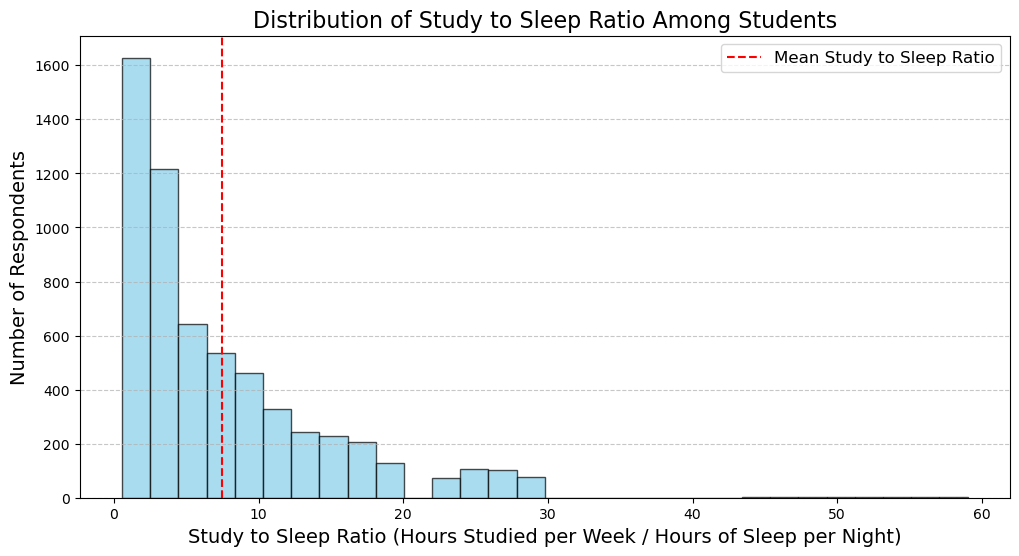

In [71]:
# Calculate the mean of the study to sleep ratio
mean_ratio = data['study_to_sleep_ratio'].mean()

# Plotting the histogram with improved titles and labels
plt.figure(figsize=(12,6))
plt.hist(data['study_to_sleep_ratio'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add a vertical line for the mean ratio
plt.axvline(mean_ratio, color='red', linestyle='--', label='Mean Study to Sleep Ratio')

# Adding titles and labels
plt.title('Distribution of Study to Sleep Ratio Among Students', fontsize=16)
plt.xlabel('Study to Sleep Ratio (Hours Studied per Week / Hours of Sleep per Night)', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

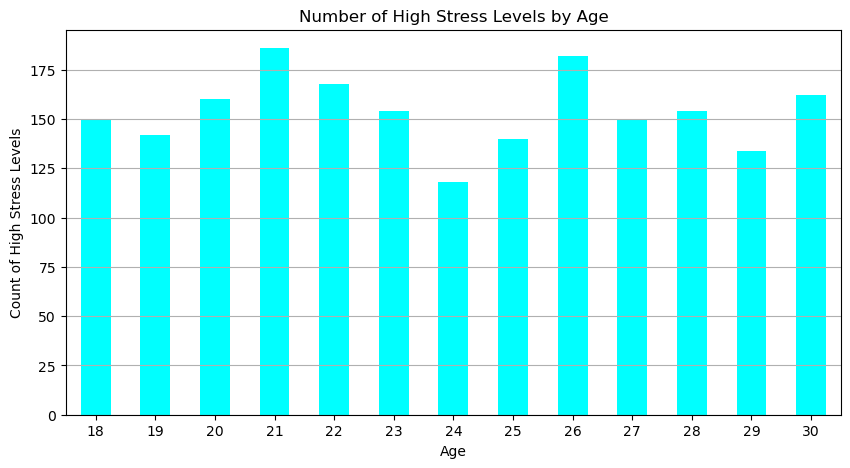

In [68]:


# Count high stress levels by age
high_stress_age = data[data['stress_category'] == 'High'].groupby('what_is_your_age?').size()

# Plotting the results
plt.figure(figsize=(10, 5))
high_stress_age.plot(kind='bar', color='cyan')
plt.title('Number of High Stress Levels by Age')
plt.xlabel('Age')
plt.ylabel('Count of High Stress Levels')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


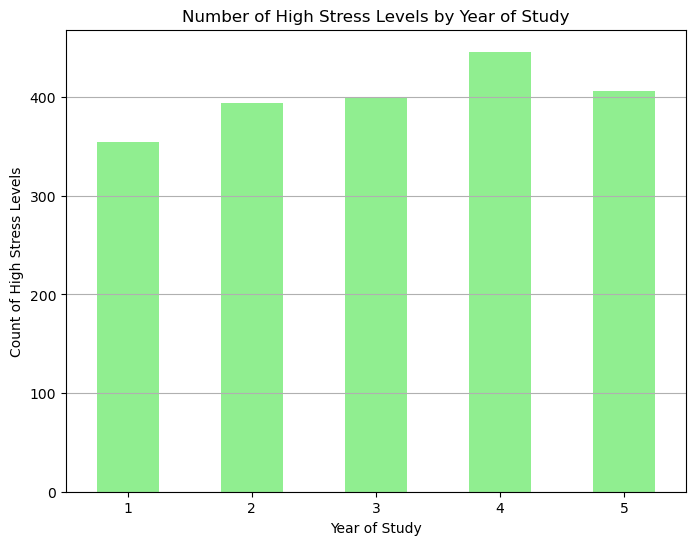

In [65]:


# Count high stress levels by year of study
high_stress_years = data[data['stress_category'] == 'High'].groupby('what_is_your_current_year_of_study?').size()

# Plotting the results
plt.figure(figsize=(8,6))
high_stress_years.plot(kind='bar', color='lightgreen')
plt.title('Number of High Stress Levels by Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Count of High Stress Levels')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


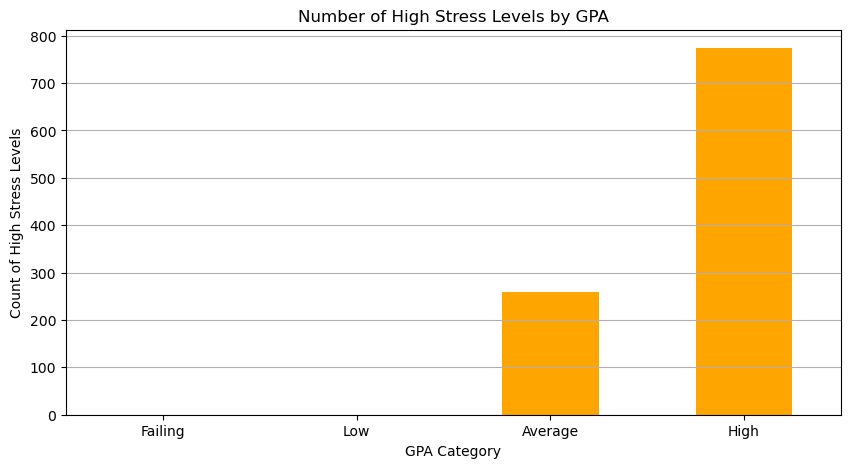

In [66]:


# Count high stress levels by GPA category
data['gpa_category'] = pd.cut(data['what_is_your_current_gpa_or_average_grade?'], 
                               bins=[-1, 1, 2, 3, 4], 
                               labels=['Failing', 'Low', 'Average', 'High'])

high_stress_gpa = data[data['stress_category'] == 'High'].groupby('gpa_category').size()

# Plotting the results
plt.figure(figsize=(10,5))
high_stress_gpa.plot(kind='bar', color='orange')
plt.title('Number of High Stress Levels by GPA')
plt.xlabel('GPA Category')
plt.ylabel('Count of High Stress Levels')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib  # for saving the model


final_model = RandomForestClassifier(random_state=42)

final_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [48]:

y_pred = final_model.predict(X_test_scaled)




In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8433333333333334
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       314
           1       0.71      0.75      0.73       297
           2       0.76      0.68      0.72       302
           3       0.83      0.88      0.86       292
           4       0.89      0.86      0.88       314
           5       0.95      0.94      0.94       281

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


print(classification_report(y_test, y_pred))


Accuracy: 84.33%
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       314
           1       0.71      0.75      0.73       297
           2       0.76      0.68      0.72       302
           3       0.83      0.88      0.86       292
           4       0.89      0.86      0.88       314
           5       0.95      0.94      0.94       281

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



In [51]:
# Save the model to a file
joblib.dump(final_model, 'new_stress_prediction_model.pkl')
# Save the preprocessor for later use
joblib.dump(preprocessor, 'data_preprocessor.pkl')


['data_preprocessor.pkl']

In [52]:

print(preprocessor.transformers_)


[('num', StandardScaler(), Index(['what_is_your_age?', 'what_is_your_current_year_of_study?',
       'what_is_your_current_gpa_or_average_grade?',
       'how_many_hours_do_you_study_per_week?',
       'how_many_assignments_or_deadlines_do_you_have_each_week?',
       'how_much_academic_pressure_do_you_feel?',
       'how_would_you_rate_your_level_of_social_support?',
       'how_would_you_rate_your_sleep_quality?',
       'how_many_hours_of_sleep_do_you_get_per_night?',
       'how_would_you_rate_the_quality_of_your_diet?',
       'how_many_hours_do_you_spend_on_screens_phone_computer_tv_per_day?',
       'how_would_you_rate_your_anxiety_levels?',
       'how_would_you_rate_your_depression_symptoms?'],
      dtype='object')), ('cat', OneHotEncoder(), Index(['what_is_your_major_or_field_of_study?',
       'how_often_do_you_attend_classes?',
       'how_often_do_you_engage_in_physical_activity?'],
      dtype='object')), ('remainder', 'drop', [1, 10, 11, 12, 20])]


In [53]:
# Load the trained model and preprocessor
loaded_model = joblib.load('new_stress_prediction_model.pkl')
loaded_preprocessor = joblib.load('data_preprocessor.pkl')

print("Model and preprocessor loaded successfully!")


Model and preprocessor loaded successfully!


In [54]:
import pandas as pd

def predict_stress_level(input_data):
   
    input_df = pd.DataFrame(input_data)
    input_scaled = loaded_preprocessor.transform(input_df)
    
    
    predictions = loaded_model.predict(input_scaled)
    
    
    stress_levels = {
        0: 'Low', 1: 'Low',     # 0-1 are "Low"
        2: 'Medium', 3: 'Medium',  # 2-3 are "Medium"
        4: 'High', 5: 'High'   # 4-5 are "High"
    }
    
    return [stress_levels.get(pred, "Unknown") for pred in predictions]


In [55]:
preprocessor = joblib.load('data_preprocessor.pkl')
input_example = {
    'what_is_your_age?': [21],  # Age
    'what_is_your_current_year_of_study?': [2],  # Sophomore year
    'what_is_your_current_gpa_or_average_grade?': [3.2],  # Average GPA
    'how_many_hours_do_you_study_per_week?': [25],  # Moderate study hours
    'how_many_assignments_or_deadlines_do_you_have_each_week?': [4],  # Moderate number of assignments
    'how_much_academic_pressure_do_you_feel?': [4],  # Moderate pressure
    'how_would_you_rate_your_level_of_social_support?': [3],  # Moderate support
    'how_would_you_rate_your_sleep_quality?': [3],  # Average sleep quality
    'how_many_hours_of_sleep_do_you_get_per_night?': [6],  # Somewhat insufficient sleep
    'how_would_you_rate_the_quality_of_your_diet?': [3],  # Average diet quality
    'how_many_hours_do_you_spend_on_screens_phone_computer_tv_per_day?': [4],  # Moderate screen time
    'how_would_you_rate_your_anxiety_levels?': [3],  # Moderate anxiety
    'how_would_you_rate_your_depression_symptoms?': [2],  # Low to moderate depression
    'what_is_your_major_or_field_of_study?': ['Law'],  # Major
    'how_often_do_you_attend_classes?': ['Frequently'],  # Regular attendance
    'how_often_do_you_engage_in_physical_activity?': ['Sometimes'],  # Some physical activity
}


In [56]:
predicted_stress_level = predict_stress_level(input_example)
print(predicted_stress_level)


['Medium']


<Figure size 1000x600 with 0 Axes>

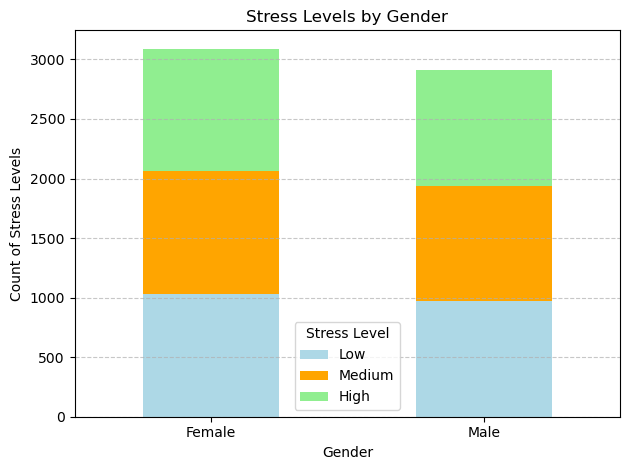

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('stress_level.csv')

# Assuming 'what_is_your_gender?' and 'how_would_you_rate_your_current_stress_level?' are the relevant columns
# Create a new column for stress categories if it doesn't exist
data['stress_category'] = pd.cut(data['how_would_you_rate_your_current_stress_level?'], bins=[-1, 1, 3, 5], labels=['Low', 'Medium', 'High'])

# Count the number of occurrences for each stress category by gender
stress_by_gender = data.groupby(['what_is_your_gender?', 'stress_category']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
stress_by_gender.plot(kind='bar', stacked=True, color=['lightblue', 'orange', 'lightgreen'])
plt.title('Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Stress Levels')
plt.xticks(rotation=0)
plt.legend(title='Stress Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [76]:
import pandas as pd
import joblib
from prettytable import PrettyTable

# Load the preprocessor and model
preprocessor = joblib.load('data_preprocessor.pkl')
model = joblib.load('new_stress_prediction_model.pkl')  # Replace with your actual model path

# Define input examples for low, medium, and high stress levels
input_examples = {
    'Low Stress Example': {
        'what_is_your_age?': [19],
        'what_is_your_current_year_of_study?': [1],
        'what_is_your_current_gpa_or_average_grade?': [3.5],
        'how_many_hours_do_you_study_per_week?': [15],
        'how_many_assignments_or_deadlines_do_you_have_each_week?': [1],
        'how_much_academic_pressure_do_you_feel?': [2],
        'how_would_you_rate_your_level_of_social_support?': [4],
        'how_would_you_rate_your_sleep_quality?': [4],
        'how_many_hours_of_sleep_do_you_get_per_night?': [8],
        'how_would_you_rate_the_quality_of_your_diet?': [4],
        'how_many_hours_do_you_spend_on_screens_phone_computer_tv_per_day?': [2],
        'how_would_you_rate_your_anxiety_levels?': [1],
        'how_would_you_rate_your_depression_symptoms?': [1],
        'what_is_your_major_or_field_of_study?': ['Law'],
        'how_often_do_you_attend_classes?': ['Always'],
        'how_often_do_you_engage_in_physical_activity?': ['Never'],
    },
    'Medium Stress Example': {
        'what_is_your_age?': [21],
        'what_is_your_current_year_of_study?': [2],
        'what_is_your_current_gpa_or_average_grade?': [3.2],
        'how_many_hours_do_you_study_per_week?': [25],
        'how_many_assignments_or_deadlines_do_you_have_each_week?': [4],
        'how_much_academic_pressure_do_you_feel?': [3],
        'how_would_you_rate_your_level_of_social_support?': [3],
        'how_would_you_rate_your_sleep_quality?': [3],
        'how_many_hours_of_sleep_do_you_get_per_night?': [6],
        'how_would_you_rate_the_quality_of_your_diet?': [3],
        'how_many_hours_do_you_spend_on_screens_phone_computer_tv_per_day?': [4],
        'how_would_you_rate_your_anxiety_levels?': [3],
        'how_would_you_rate_your_depression_symptoms?': [2],
        'what_is_your_major_or_field_of_study?': ['Law'],
        'how_often_do_you_attend_classes?': ['Frequently'],
        'how_often_do_you_engage_in_physical_activity?': ['Sometimes'],
    },
    'High Stress Example': {
        'what_is_your_age?': [23],
        'what_is_your_current_year_of_study?': [4],
        'what_is_your_current_gpa_or_average_grade?': [2.5],
        'how_many_hours_do_you_study_per_week?': [40],
        'how_many_assignments_or_deadlines_do_you_have_each_week?': [8],
        'how_much_academic_pressure_do_you_feel?': [5],
        'how_would_you_rate_your_level_of_social_support?': [2],
        'how_would_you_rate_your_sleep_quality?': [2],
        'how_many_hours_of_sleep_do_you_get_per_night?': [4],
        'how_would_you_rate_the_quality_of_your_diet?': [2],
        'how_many_hours_do_you_spend_on_screens_phone_computer_tv_per_day?': [6],
        'how_would_you_rate_your_anxiety_levels?': [5],
        'how_would_you_rate_your_depression_symptoms?': [4],
        'what_is_your_major_or_field_of_study?': ['Law'],
        'how_often_do_you_attend_classes?': ['Rarely'],
        'how_often_do_you_engage_in_physical_activity?': ['Never'],
    }
}

# Initialize a list to store results
results = []

# Process each example
for stress_level, inputs in input_examples.items():
    # Convert to DataFrame
    input_df = pd.DataFrame(inputs)

    # Preprocess the input
    processed_input = preprocessor.transform(input_df)

    # Make predictions using the model
    prediction = model.predict(processed_input)

    # Create a string representation of the input example
    input_example_str = ', '.join([f"{k}: {v[0]}" for k, v in inputs.items()])

    # Store results
    results.append({
        'Feature': stress_level,
        'Input Example': input_example_str,
        'Predicted Stress Level': prediction[0]
    })

# Create a PrettyTable
table = PrettyTable()

# Add columns to the table
table.field_names = ["Feature", "Input Example", "Predicted Stress Level"]
for result in results:
    table.add_row([result['Feature'], result['Input Example'], result['Predicted Stress Level']])

# Display the table
print(table)


+-----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------+
|        Feature        |                                                                                                                                                             